In [1]:
import matplotlib.pyplot as plt

from dataclasses import dataclass

In [2]:
@dataclass
class Assets:
    # Cash and cash equivalents
    cash: int
    # Short-term investments
    short: int
    # Accounts receivable, net
    receivables: int
    # Other current receivables, net..
    other_receivables: int
    # Prepaid expenses and other current assets
    prepaid: int

    def total(self):
        return self.cash + self.short + self.receivables + self.other_receivables + self.prepaid

# UNH

In [3]:
unh_25q2 = Assets(
    cash = 28_596,
    short = 3_424,
    receivables = 24_142,
    other_receivables = 28_582,
    prepaid = 8_955
)

unh_24q4 = Assets(
    cash = 25_312,
    short = 3_801,
    receivables = 22_365,
    other_receivables = 26_089,
    prepaid = 8_212
)

In [4]:
# Calculate proportions for each quarter
def get_proportions(assets):
    total = assets.total()
    return {
        'Cash': (assets.cash + assets.short) / total,
        'Receivables': (assets.receivables + assets.receivables ) / total,
        'Prepaid': assets.prepaid / total
    }

def plot_asset_composition_comp(assets_new, assets_old, label_new='2025 Q2', label_old='2024 Q4'):
    props_new = get_proportions(assets_new)
    props_old = get_proportions(assets_old)
    
    categories = list(props_new.keys())
    new_values = list(props_new.values())
    old_values = list(props_old.values())
    
    x = range(len(categories))
    width = 0.35
    
    fig, ax = plt.subplots()
    ax.bar([i - width/2 for i in x], new_values, width, label=label_new)
    ax.bar([i + width/2 for i in x], old_values, width, label=label_old)
    
    ax.set_ylabel('Proportion of Total Assets')
    ax.set_title('Asset Composition Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    
    plt.tight_layout()
    plt.show()
    
    print(f'{label_new}: {new_values=}')
    print(f'{label_old}: {old_values=}')

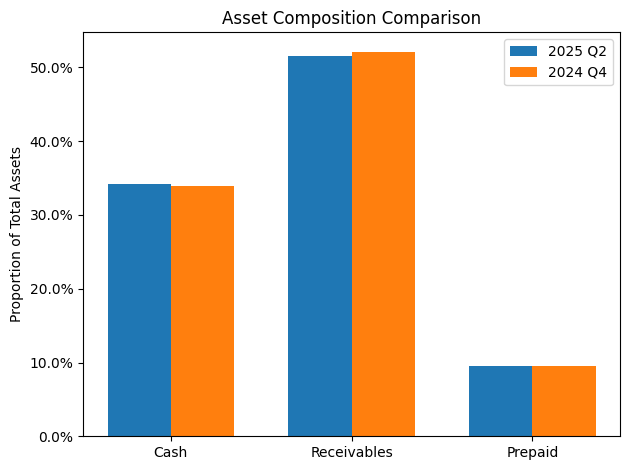

2025 Q2: new_values=[0.34173256918430295, 0.5153096617893468, 0.09557199116319277]
2024 Q4: old_values=[0.3393954231222094, 0.5214563004931276, 0.0957343872043274]


In [5]:
plot_asset_composition_comp(unh_25q2, unh_24q4, label_new='2025 Q2', label_old='2024 Q4')